## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [3]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/
import pandas as pd
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.



In [80]:
df_0 = pd.read_csv("data_000637.txt") #initial dataframe
N = npr.randint(10000, len(df_0)) 
df = pd.read_csv("data_000637.txt", nrows = N) #modifying it setting to N the number of rows
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
396128,1,1,14,3869204151,1022,11
396129,1,1,18,3869204151,1031,3
396130,1,0,46,3869204151,1476,12
396131,1,1,11,3869204151,1474,20


2\. Find out the number of BX in a ORBIT (the value 'x').



In [81]:
x_value = df["BX_COUNTER"].max()+1  #
print("The number of BX in a ORBIT is: ", x_value)

The number of BX in a ORBIT is:  3564


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [82]:
lasted_data = df["ORBIT_CNT"].max()-df["ORBIT_CNT"].min()
lasted_time_s = x_value*lasted_data*25e-9
print("The data lasted", lasted_time_s, "seconds")

The data lasted 0.35497439999999997 seconds


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [83]:
df["ABS_TIME (ns)"] = df['ORBIT_CNT']*x_value*25e-9+df['BX_COUNTER']*25e-9+df['TDC_MEAS']*25/30 #creating the new column
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME (ns)
0,1,0,123,3869200167,2374,26,344767.401606
1,1,0,124,3869200167,2374,27,344768.234939
2,1,0,63,3869200167,2553,28,344769.068277
3,1,0,64,3869200167,2558,19,344761.568277
4,1,0,64,3869200167,2760,25,344766.568282
...,...,...,...,...,...,...,...
396128,1,1,14,3869204151,1022,11,344755.256546
396129,1,1,18,3869204151,1031,3,344748.589880
396130,1,0,46,3869204151,1476,12,344756.089891
396131,1,1,11,3869204151,1474,20,344762.756558


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [84]:
df["HEAD"] = npr.randint(0, 2, len(df))
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME (ns)
0,1,0,123,3869200167,2374,26,344767.401606
1,0,0,124,3869200167,2374,27,344768.234939
2,0,0,63,3869200167,2553,28,344769.068277
3,1,0,64,3869200167,2558,19,344761.568277
4,1,0,64,3869200167,2760,25,344766.568282
...,...,...,...,...,...,...,...
396128,1,1,14,3869204151,1022,11,344755.256546
396129,1,1,18,3869204151,1031,3,344748.589880
396130,1,0,46,3869204151,1476,12,344756.089891
396131,0,1,11,3869204151,1474,20,344762.756558


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [85]:
df_new = df[df["HEAD"]==1]
df_new

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABS_TIME (ns)
0,1,0,123,3869200167,2374,26,344767.401606
3,1,0,64,3869200167,2558,19,344761.568277
4,1,0,64,3869200167,2760,25,344766.568282
8,1,0,62,3869200167,2774,21,344763.234949
10,1,1,7,3869200167,2785,4,344749.068283
...,...,...,...,...,...,...,...
396119,1,1,6,3869204151,796,3,344748.589874
396122,1,0,56,3869204151,809,23,344765.256541
396128,1,1,14,3869204151,1022,11,344755.256546
396129,1,1,18,3869204151,1031,3,344748.589880


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

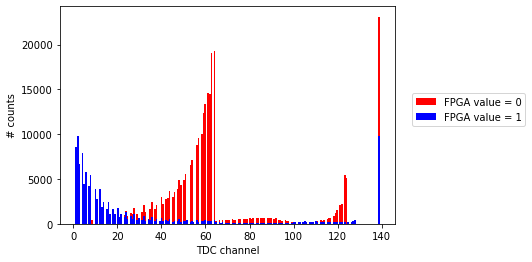

In [86]:
occ_data = [occ_data_1, occ_data_2]
colors = ["r", "b"]
labels = ["FPGA value = 0", "FPGA value = 1"]

for i, o, c, l in zip(df["FPGA"].unique(), occ_data, colors, labels):
    o = df[df["FPGA"] == i]["TDC_CHANNEL"]
    plt.hist(o, color = c, bins = o.max()+50, label = l)
    
plt.xlabel("TDC channel")
plt.ylabel("# counts")
plt.legend(loc = (1.05, 0.45))
plt.show()

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [87]:
gb = df.groupby('TDC_CHANNEL')['FPGA']
top_3 = gb.count().nlargest(3)
top_3

TDC_CHANNEL
139    32951
64     19773
63     19344
Name: FPGA, dtype: int64

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [88]:
unique_orbits = len(df["ORBIT_CNT"].unique())
channel_139 = len(df[df['TDC_CHANNEL']==139]["ORBIT_CNT"].unique())
print("Number of unique orbits: ", unique_orbits, "\nNumber of unique orbits with at least one measurement from TDC_CHANNEL = 139: ", channel_139)

Number of unique orbits:  3982 
Number of unique orbits with at least one measurement from TDC_CHANNEL = 139:  3972
